# TODO
- [ ] Increase observation size, remove random


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


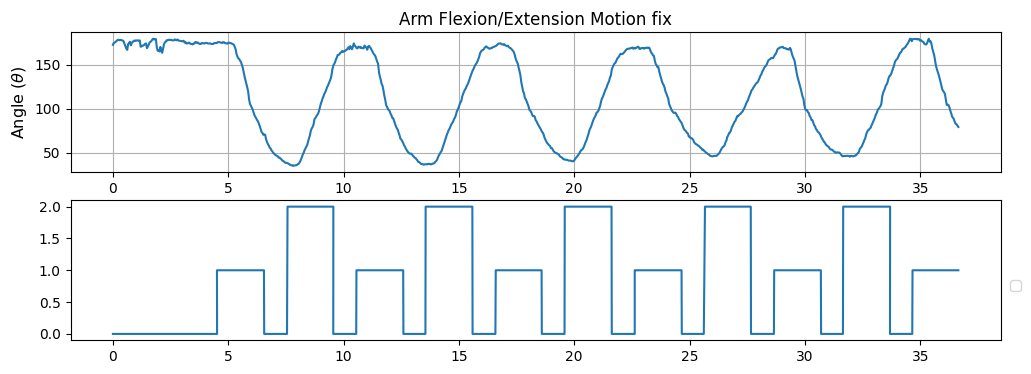

In [62]:
#correct angle
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

fs = 250
duration = 40

D = ("../arm-track/CapiLab-dataset3b/*angle*", "../arm-track/CapiLab-dataset3b/*timestamps*", "../arm-track/CapiLab-dataset3b/*event*")
DATA_PATH = [(fa, ft, fe) for fa, ft, fe in zip(glob(D[0]), glob(D[1]), glob(D[2]))]
f, axs= plt.subplots(2,1,figsize = (12,4))
for i,(fa, ft, fe) in enumerate(DATA_PATH):

    a = np.load(fa, allow_pickle=True)
    t = np.load(ft)
    e = np.load(fe)
    t = t - t[0] #remove starting offset time
    if t[-1] - t[0] > 40:
        a = a[:fs * duration]
        t = t[:fs * duration]
        e = e[:fs * duration]
    start_t, end_t = t[0], t[-1]
    axs[0].plot(np.linspace(start_t, end_t, len(a)), a, label = f'Trial-{i + 1}')
    axs[0].grid(True)
    axs[0].set_title("Arm Flexion/Extension Motion fix")
    axs[0].set_xlabel('Time (s)', fontsize = 11.5)
    axs[0].set_ylabel(r'Angle ($\theta$)', fontsize = 11.5)

    axs[1].plot(t, e)
    break

plt.legend(loc = (1.01,0.349))


plt.show()


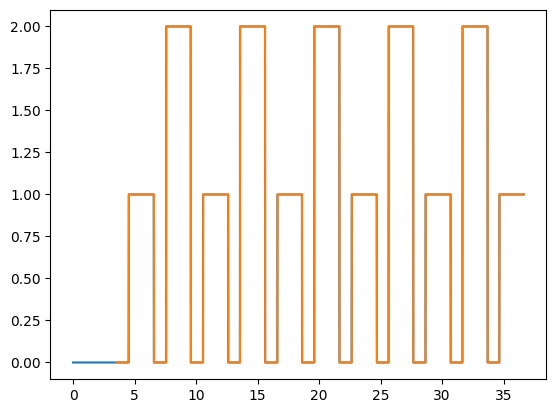

In [74]:
onset_start_offset = fs * 1
f, axs = plt.sub
start_index = np.where(e != 0)[0][0] - onset_start_offset
ori_time = np.linspace(t[0], t[-1], len(e))
offset_time = np.linspace(t[start_index], t[-1], len(e[start_index:]))

plt.plot(ori_time, e)
plt.plot(offset_time, e[start_index:])
